# Importing regular libraries
* **pandas**: analyzing, cleaning, exploring, and manipulating data.
* **numpy** : perform a wide variety of mathematical operations on arrays.
* matplotlib.pyplot : a collection of command style functions that make matplotlib work like MATLAB.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Mounting  on drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading and cleaning data from dataset

## Reading data
* pandas.read_csv()


## Cleaning data
* pd.factorize() on carName column and class column in carFeatures dataset .

In [ ]:

instituteInventory_dataFrame = pd.read_csv('/content/drive/MyDrive/arad_csv/Instituteinventory.csv')





instituteInventory_dataFrame = instituteInventory_dataFrame.set_axis(['Carname','first_Institute ','second_Institute ',
                                                                      'Third_Institute','Fourth_Institute'],
                                                                     axis=1)
instituteInventory_dataFrame['Carname'] = pd.factorize(instituteInventory_dataFrame['Carname'])[0]







instituteInventory_dataFrame






,Carname,first_Institute,second_Institute,Third_Institute,Fourth_Institute
0,0,0,0,0,4
1,1,2,0,0,0
2,2,1,2,3,0
3,3,0,2,0,0
4,4,0,0,1,2
5,5,0,2,2,0
6,6,1,0,4,2
7,7,1,0,0,4
8,8,0,2,0,2


In [ ]:



carFeatures_dataFrame = pd.read_csv('/content/drive/MyDrive/arad_csv/Carfeatures.csv')




carFeatures_dataFrame = carFeatures_dataFrame.set_axis(['Carname' , 'speed' , 'class' , 'Rental_price'] , axis=1)
carFeatures_dataFrame['Carname'] = pd.factorize(carFeatures_dataFrame['Carname'])[0]
carFeatures_dataFrame['class'] = pd.factorize(carFeatures_dataFrame['class'])[0]




carFeatures_dataFrame


,Carname,speed,class,Rental_price
0,0,200,0,1000
1,1,250,1,500
2,2,180,2,700
3,3,180,1,1000
4,4,150,2,500
...,...,...,...,...
283,4,110,2,530
284,5,250,1,900
285,6,200,3,800
286,7,300,0,950


# Prepare data for operations before merging
## Get the name of the institutions:



In [ ]:
carFeatures_values = carFeatures_dataFrame.values
instituteInventory_values = instituteInventory_dataFrame.values


# Get the name of the institutions
instituteName = []
column=0
for title in instituteInventory_dataFrame.columns:
  if column == 0 :
    pass
  if column!= 0:
    instituteName.append(title)
  column+=1


# Generating unique IDs for institutions
instituteId = np.arange(1, column).tolist() # column = 5


# Separating the type of machines
carTypes = instituteInventory_values[: , 0]





# Generate car dataFrame with carID
## We merge two sets together using Cartesian multiplication

In [ ]:

# Generate sample car data
car_ids = range(0, 288)

carTypes
car_data = []

# Generate car dataFrame
carTypeID = 0
for car_id in car_ids:
    car_type = carTypes[carTypeID]
    car_data.append({'CarID': car_id, 'CarType': car_type,
                     'Feature1':carFeatures_values[car_id , 1 ],
                     'Feature2': carFeatures_values[car_id , 2 ],
                     'Feature3': carFeatures_values[car_id , 3 ]})

    carTypeID+=1
    if carTypeID == 9 :
      carTypeID=0

carDataFrame = pd.DataFrame(car_data)


# Generate institutions data
institution_data = {
    'InstitutionID': instituteId ,
    'InstitutionName': instituteName
}

institutionsDataFrame = pd.DataFrame(institution_data)



# Create a dummy key to perform a Cartesian product
carDataFrame['DummyKey'] = 1
institutionsDataFrame['DummyKey'] = 1

# Merge the dataframes using the dummy key
mergedData = pd.merge(carDataFrame, institutionsDataFrame, on='DummyKey')

# Drop the dummy key column
mergedData.drop('DummyKey', axis=1, inplace=True)
carDataFrame


,CarID,CarType,Feature1,Feature2,Feature3,DummyKey
0,0,0,200,0,1000,1
1,1,1,250,1,500,1
2,2,2,180,2,700,1
3,3,3,180,1,1000,1
4,4,4,150,2,500,1
...,...,...,...,...,...,...
283,283,4,110,2,530,1
284,284,5,250,1,900,1
285,285,6,200,3,800,1
286,286,7,300,0,950,1


# Drop the lines that the existence of the car in the institution is not confirmed
* zerosIndex : To extract the indices that are 0

In [ ]:

# extracing zeros index
zerosIndex = []
rows , cols = instituteInventory_values.shape
for row in range (rows):
  for col in range(1 , cols):
    if instituteInventory_values[row,col] == 0 :
      zerosIndex.append([row,col])


# Drop the lines that the existence of the car in the institution is not confirmed
for Index in zerosIndex :
  carname , instituteid = Index
  indexAge = mergedData[ (mergedData['CarType'] == carname) & (mergedData['InstitutionID'] == instituteid) ].index
  mergedData.drop(indexAge , inplace=True)


In [ ]:
mergedData

,CarID,CarType,Feature1,Feature2,Feature3,InstitutionID,InstitutionName
3,0,0,200,0,1000,4,Fourth_Institute
4,1,1,250,1,500,1,first_Institute
8,2,2,180,2,700,1,first_Institute
9,2,2,180,2,700,2,second_Institute
10,2,2,180,2,700,3,Third_Institute
...,...,...,...,...,...,...,...
1143,285,6,200,3,800,4,Fourth_Institute
1144,286,7,300,0,950,1,first_Institute
1147,286,7,300,0,950,4,Fourth_Institute
1149,287,8,200,0,2000,2,second_Institute


# Make usable data

In [ ]:
mergedData.drop(["CarID", "InstitutionName"], axis = 1, inplace = True)
mergedData

,CarType,Feature1,Feature2,Feature3,InstitutionID
3,0,200,0,1000,4
4,1,250,1,500,1
8,2,180,2,700,1
9,2,180,2,700,2
10,2,180,2,700,3
...,...,...,...,...,...
1143,6,200,3,800,4
1144,7,300,0,950,1
1147,7,300,0,950,4
1149,8,200,0,2000,2


In [ ]:
mergedData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 3 to 1151
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CarType        544 non-null    int64
 1   Feature1       544 non-null    int64
 2   Feature2       544 non-null    int64
 3   Feature3       544 non-null    int64
 4   InstitutionID  544 non-null    int64
dtypes: int64(5)
memory usage: 25.5 KB


# Pre_processing

In [ ]:
mergedData_values = mergedData.values
Xdata = mergedData_values[: , 1:5]
ydata = mergedData_values[: , 0]



#Xdata=Xdata.astype('int')
#ydata=ydata.astype('int')


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( Xdata, ydata, test_size=0.20  , random_state=10)







# Building KNN model

[0.01285485 0.02348061 0.02497848 0.02636219 0.03104328 0.03299665
 0.03707407 0.03968947 0.04026891 0.04184868 0.04232571 0.04184868
 0.04184868 0.04134748 0.04232571 0.04232571 0.04232571 0.04232571
 0.04134748]
[0.98165138 0.93577982 0.9266055  0.91743119 0.88073394 0.86238532
 0.81651376 0.77981651 0.7706422  0.74311927 0.73394495 0.74311927
 0.74311927 0.75229358 0.73394495 0.73394495 0.73394495 0.73394495
 0.75229358]


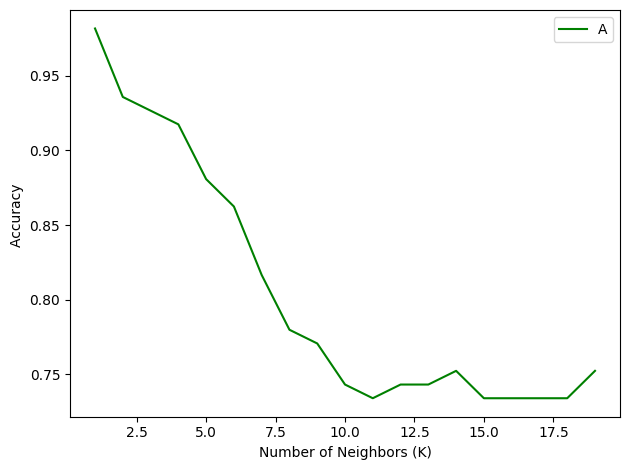

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import seaborn as sns


Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors= n ).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test , yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print (std_acc)
print(mean_acc)

plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Visualize result

<Axes: >

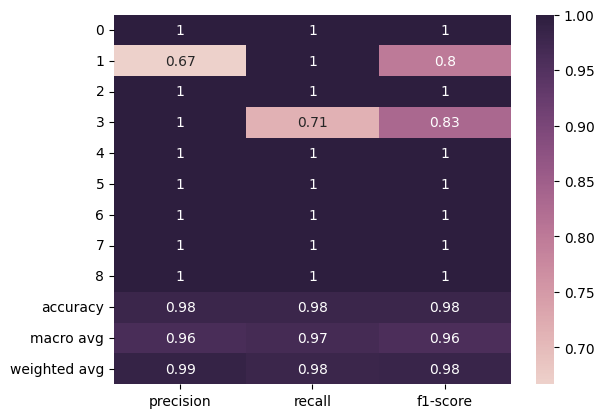

In [ ]:


true = y_test
pred = y_pred
labels = np.arange(9)
target_names = list("012345678")

clf_report = classification_report(true,
                                   pred,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True , cmap=sns.cubehelix_palette(as_cmap=True))

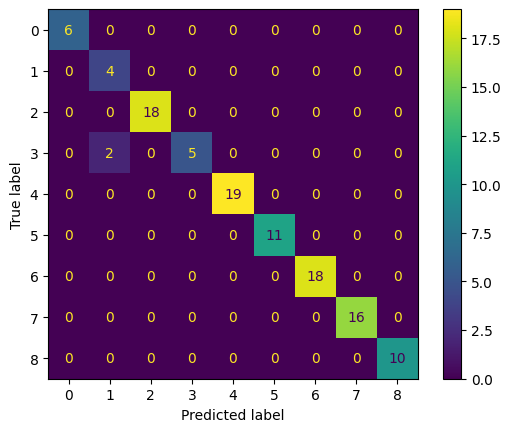

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()